In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [2]:
from google.colab import files
uploaded=files.upload()

Saving housing (1).csv to housing (1).csv


In [3]:
l2=pd.read_csv('housing (1).csv')

### 1.Perform the describe and info steps

In [4]:
l2_info=l2.info()
l2_describe=l2.describe()
l2_info
l2_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##2.Plot the histogram of each feature( Indicate what does histogram indicate on median_income and house_median_age)

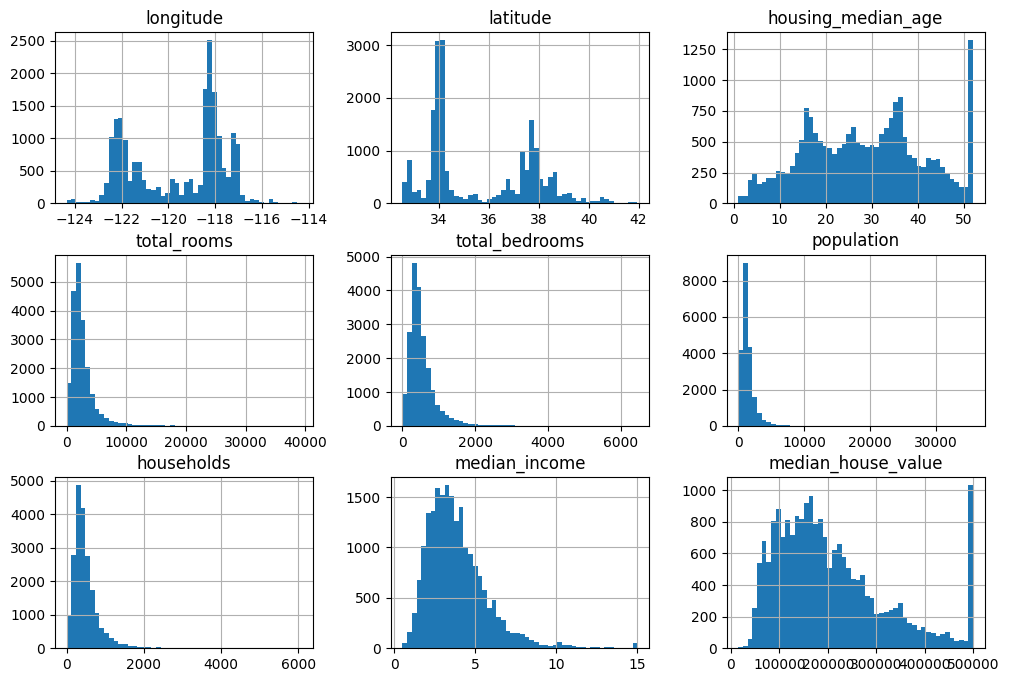

In [5]:
l2.hist(figsize=(12, 8), bins=50)
plt.show()

## 3.Demonstrate the process of creating a test set( write the difference between random and stratified test set)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
bins = [0, 150000, 300000, 500000, 700000, 1000000, 10000000]
labels = [1, 2, 3, 4, 5, 6]
l2['price_category'] = pd.cut(l2['median_house_value'], bins=bins, labels=labels)
X = l2.drop(['median_house_value', 'price_category'], axis=1)
y = l2['price_category']
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(y_train_strat.value_counts())
print(y_test_strat.value_counts())

price_category
2    7347
1    6096
3    2297
4     772
5       0
6       0
Name: count, dtype: int64
price_category
2    1837
1    1524
3     574
4     193
5       0
6       0
Name: count, dtype: int64


## 4.List the geographical features from the dataset and plot a graph to Visualize Geographical Data(what does the graph indicate w.r.t housing prices and location)

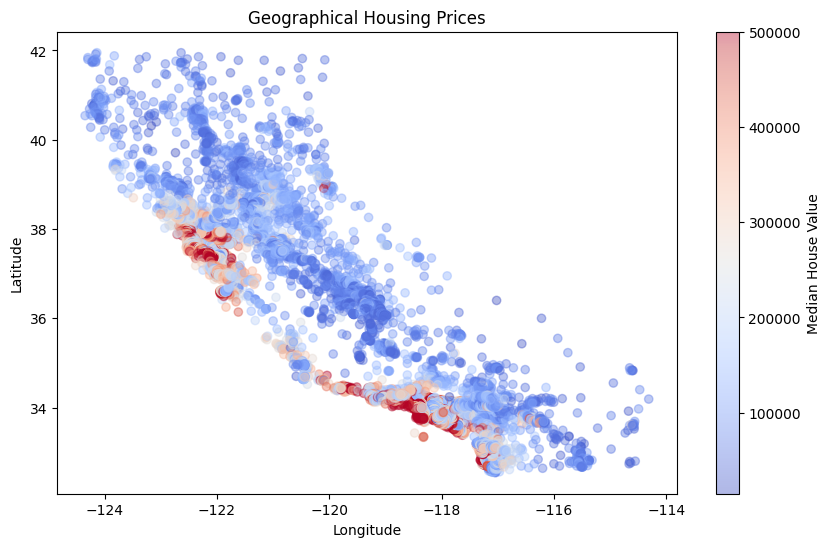

Geographical graph shows high prices near coastal regions.


In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(l2['longitude'], l2['latitude'], alpha=0.4, c=l2['median_house_value'], cmap='coolwarm')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Housing Prices")
plt.colorbar(label='Median House Value')
plt.show()
print("Geographical graph shows high prices near coastal regions.")


## 5.Plot a graph to show features correlation with housing price. Which feature corelates to the maximum. Plot the graph for that with housing price and analyze what the graph indicate

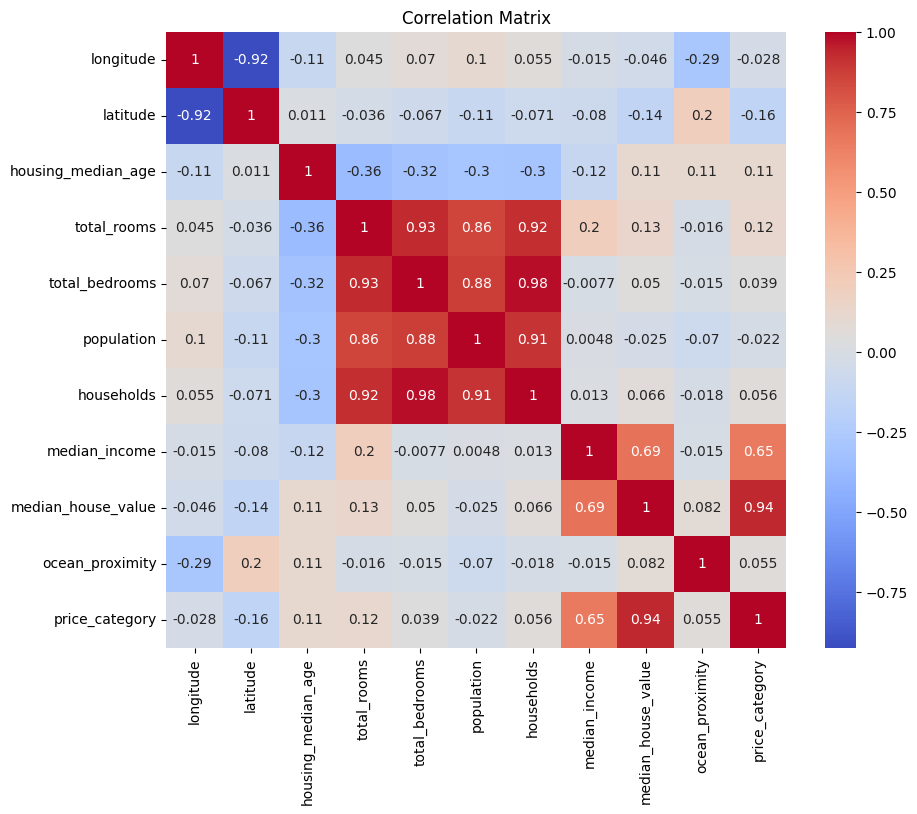

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l2['ocean_proximity'] = le.fit_transform(l2['ocean_proximity'])
corr_matrix = l2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 6.List the features that could be combined to improve correlation and plot again to see if correlation has improved

In [12]:
l2["rooms_per_household"] = l2["total_rooms"] / l2["households"]
l2["bedrooms_per_room"] = l2["total_bedrooms"] / l2["total_rooms"]
l2["people_per_household"] = l2["population"] / l2["households"]
corr_matrix = l2.corr()
print(corr_matrix)


                      longitude  latitude  housing_median_age  total_rooms  \
longitude              1.000000 -0.924664           -0.108197     0.044568   
latitude              -0.924664  1.000000            0.011173    -0.036100   
housing_median_age    -0.108197  0.011173            1.000000    -0.361262   
total_rooms            0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms         0.069608 -0.066983           -0.320451     0.930380   
population             0.099773 -0.108785           -0.296244     0.857126   
households             0.055310 -0.071035           -0.302916     0.918484   
median_income         -0.015176 -0.079809           -0.119034     0.198050   
median_house_value    -0.045967 -0.144160            0.105623     0.134153   
ocean_proximity       -0.289779  0.200974            0.112468    -0.015693   
price_category        -0.027803 -0.155036            0.106914     0.116825   
rooms_per_household   -0.027540  0.106389           -0.153277   

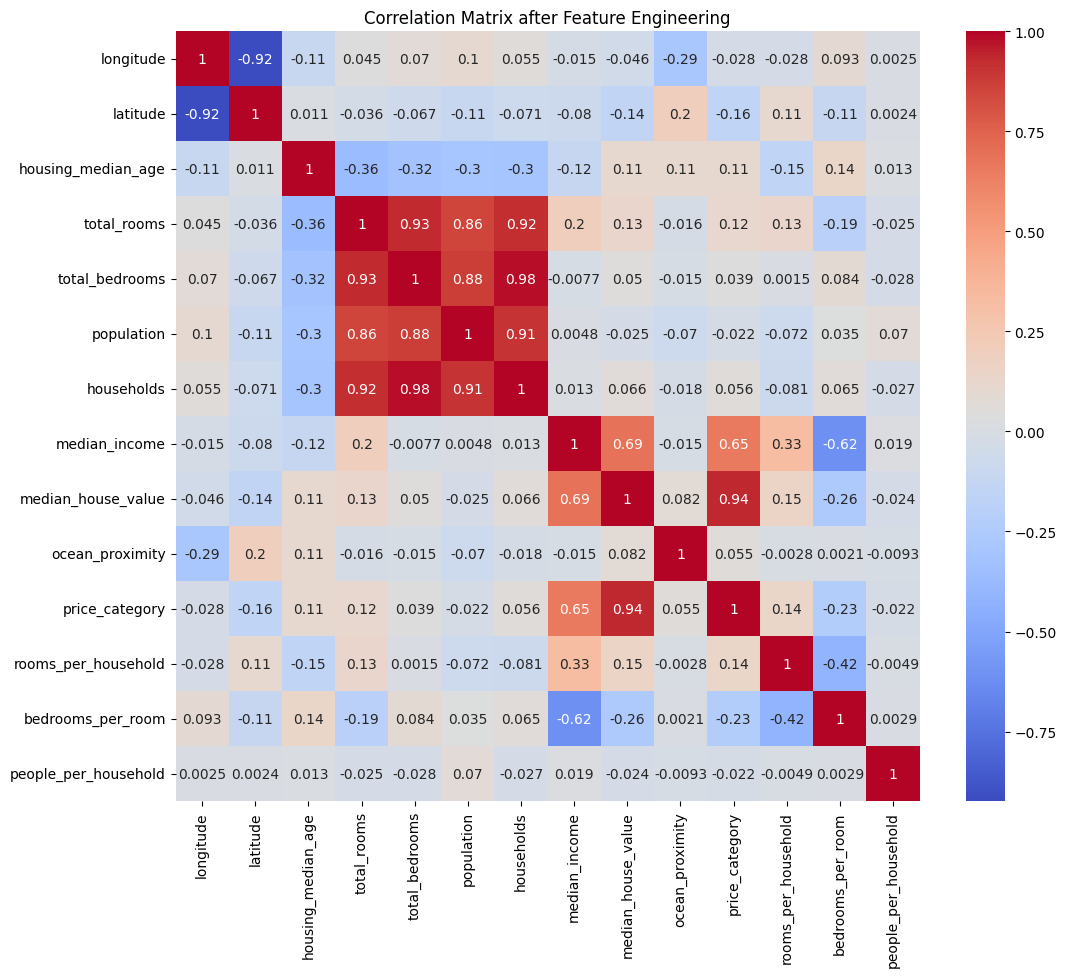

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix after Feature Engineering")
plt.show()


## 7.List the features that needs to be cleaned and demonstrate the process of cleaning

In [21]:
imputer = SimpleImputer(strategy="median")
df_numeric = l2.drop("ocean_proximity", axis=1)
imputer.fit(df_numeric)
df_numeric_cleaned = pd.DataFrame(imputer.transform(df_numeric), columns=df_numeric.columns)
print("Missing values replaced with median values.")
df_numeric_cleaned


Missing values replaced with median values.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_category,rooms_per_household,bedrooms_per_room,people_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0,5.329513,0.219892,2.123209


## 8.Is there any categorical data that needs to be converted to numerical? If so explain the method used to convert and code the same and show the output.

In [30]:
encoder = OneHotEncoder()
categorical_feature = l2[['ocean_proximity']]
ocean_proximity_encoded = encoder.fit_transform(categorical_feature).toarray()
ocean_proximity_encoded

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#10.Design a pipeline inculcating (Custom transform, feature scaling and encoding).

In [28]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, df_numeric.columns),
    ('cat', OneHotEncoder(), ['ocean_proximity'])
])
df_prepared = full_pipeline.fit_transform(l2)
df_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])